In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
abalone_data = pd.read_csv('abalone.csv')
abalone_data.head()

,Sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone_data.isnull().sum()

Sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

In [4]:
abalone_data.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


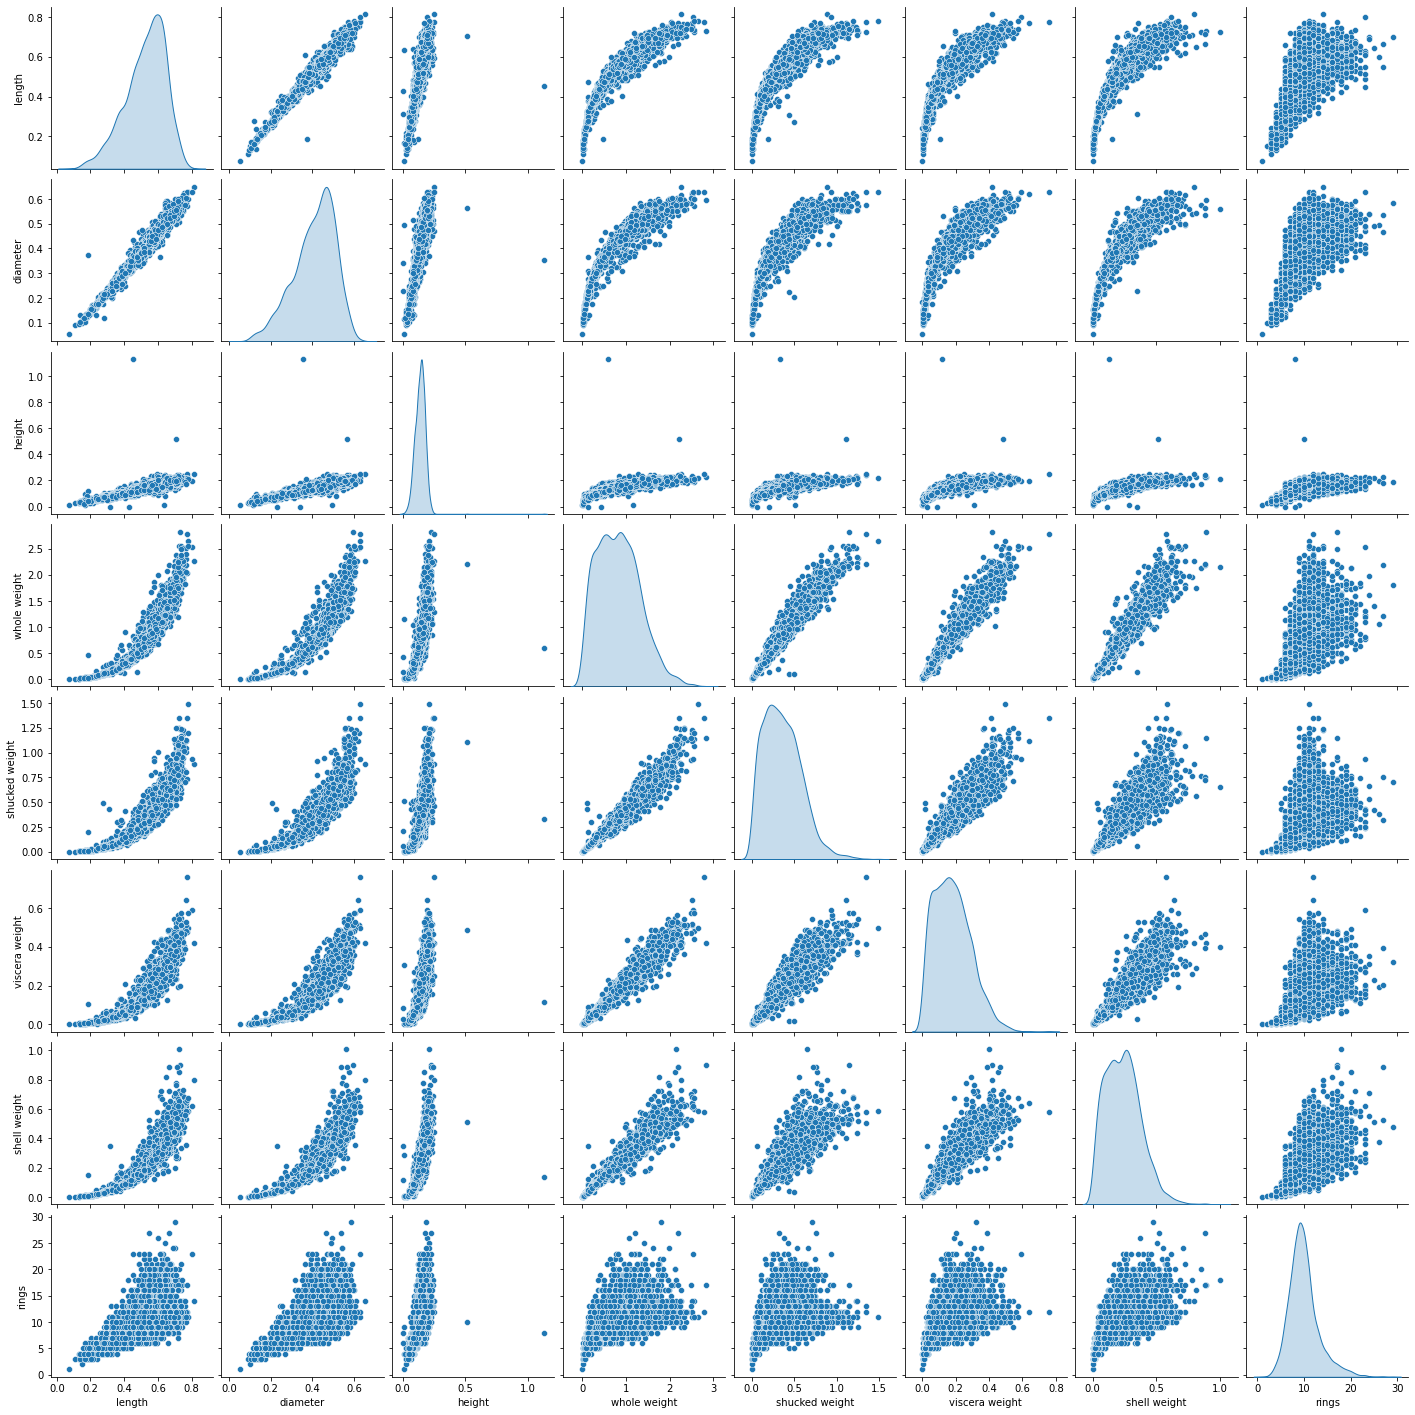

In [5]:
sns.pairplot(abalone_data, diag_kind='kde');

<AxesSubplot:>

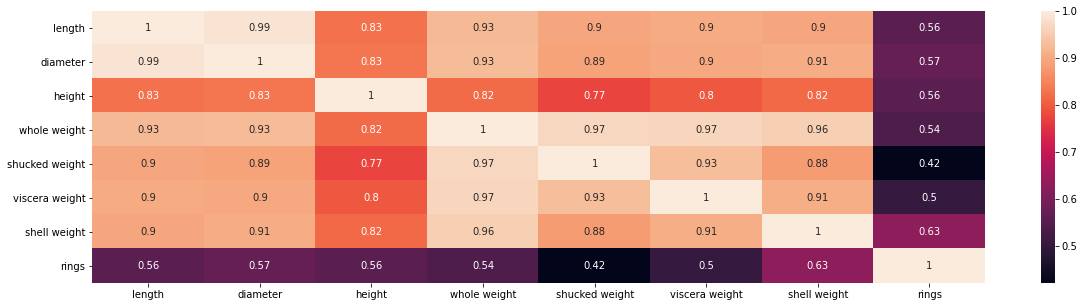

In [6]:
plt.figure(figsize=(20,5))
sns.heatmap(abalone_data.corr(), annot=True)

In [7]:
abalone_data = pd.get_dummies(abalone_data, columns=['Sex'])
abalone_data

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [8]:
# drop one of the 3 categorical sex column and split the data into independent, dependent respectively

X = abalone_data.drop(['rings', 'Sex_I'], axis=1)

y = abalone_data['rings']

In [9]:
#split the data training vs testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [10]:
# Fit the model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
rings_predict = linear_model.predict(X_test)
rings_predict

array([8.98147411, 7.33292503, 8.32688265, ..., 8.96558403, 8.98925524,
       5.78983625])

In [11]:
linear_model.coef_

array([ -1.44689712,  13.11008698,   9.49001836,   8.81256389,
       -19.9689697 ,  -9.54783363,   8.51551342,   0.74849781,
         0.89337048])

In [12]:
linear_model.intercept_

2.966524395287948

In [13]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for the column {} : {}'.format(col_name, linear_model.coef_[idx]))

The coefficient for the column length : -1.4468971245234756
The coefficient for the column diameter : 13.110086975906205
The coefficient for the column height : 9.490018357459569
The coefficient for the column whole weight : 8.81256389478456
The coefficient for the column shucked weight : -19.968969704967055
The coefficient for the column viscera weight : -9.547833627304781
The coefficient for the column shell weight : 8.515513423652957
The coefficient for the column Sex_F : 0.7484978111697049
The coefficient for the column Sex_M : 0.8933704817351596


In [14]:
linear_model.score(X_train, y_train)

0.5443255512786712

In [15]:
linear_model.score(X_test, y_test)

0.5196233420241054

(1254, 9)
(1254,)


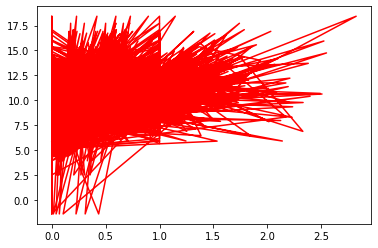

In [16]:
print(X_test.shape)
print(y_test.shape)
plt.plot(X_test, rings_predict, color='r')
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_linear_regression = LinearRegression()

poly_linear_regression.fit(X_train2, y_train)

y_predict = poly_linear_regression.predict(X_test2)

print ('The train R^2 with interaction terms: {}'.format(poly_linear_regression.score(X_train2, y_train)))
print ('The test R^2 with interaction terms: {}'.format(poly_linear_regression.score(X_test2, y_test)))

The train R^2 with interaction terms: 0.5871256873671675
The test R^2 with interaction terms: 0.5537138101473451


In [18]:
poly = PolynomialFeatures(degree=3, interaction_only=True)

X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

poly_linear_regression = LinearRegression()

poly_linear_regression.fit(X_train3, y_train)

y_predict = poly_linear_regression.predict(X_test3)

print ('The train R^2 with interaction terms: {}'.format(poly_linear_regression.score(X_train3, y_train)))
print ('The test R^2 with interaction terms: {}'.format(poly_linear_regression.score(X_test3, y_test)))

The train R^2 with interaction terms: 0.6125422719199077
The test R^2 with interaction terms: 0.5307249410279516


In [19]:
# X = abalone_data[['length', 'height', 'whole weight']]

# y = abalone_data['rings']


X = abalone_data.drop(['rings', 'Sex_I'], axis=1)

y = abalone_data['rings']

# from sklearn.feature_selection import SelectKBest, chi2, f_classif
# top_5_features = SelectKBest(chi2, k=5).fit_transform(X, y)
# top_5_features

def get_feature_correlation(df, top_n=None, corr_method='spearman',
                            remove_duplicates=True, remove_self_correlations=True):
    """
    Compute the feature correlation and sort feature pairs based on their correlation

    :param df: The dataframe with the predictor variables
    :type df: pandas.core.frame.DataFrame
    :param top_n: Top N feature pairs to be reported (if None, all of the pairs will be returned)
    :param corr_method: Correlation compuation method
    :type corr_method: str
    :param remove_duplicates: Indicates whether duplicate features must be removed
    :type remove_duplicates: bool
    :param remove_self_correlations: Indicates whether self correlations will be removed
    :type remove_self_correlations: bool

    :return: pandas.core.frame.DataFrame
    """
    corr_matrix_abs = df.corr(method=corr_method).abs()
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_correlated_features = corr_matrix_abs_us \
        .sort_values(kind="quicksort", ascending=False) \
        .reset_index()

    # Remove comparisons of the same feature
    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-1:2]

    # Create meaningful names for the columns
    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation (abs)'] 

    if top_n:
        return sorted_correlated_features[:top_n]
    print(sorted_correlated_features)

    return sorted_correlated_features

top_n_features = get_feature_correlation(X,5)

top_n_features

# corr_matrix_abs = X.corr(method='spearman').abs()
# corr_matrix_abs_us = corr_matrix_abs.unstack()
# sorted_correlated_features = corr_matrix_abs_us \
#         .sort_values(kind="quicksort", ascending=False) \
#         .reset_index()
# sorted_correlated_features = sorted_correlated_features[
#             (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
#         ]
# print(sorted_correlated_features)
# sorted_correlated_features.iloc[:-1:2]
# len(sorted_correlated_features.iloc[:-1:2])
top_n_features['Feature 1'].duplicated()
final_features = top_n_features['Feature 1'].drop_duplicates()
final_features
X[final_features]

,length,whole weight,diameter
0,0.455,0.5140,0.365
1,0.350,0.2255,0.265
2,0.530,0.6770,0.420
3,0.440,0.5160,0.365
4,0.330,0.2050,0.255
...,...,...,...
4172,0.565,0.8870,0.450
4173,0.590,0.9660,0.440
4174,0.600,1.1760,0.475
4175,0.625,1.0945,0.485


In [20]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X[final_features],y, test_size=0.3, random_state=1)

In [21]:
new_linear_model = LinearRegression()
new_linear_model.fit(X_new_train, y_new_train)
new_linear_model.intercept_

3.4240084489154956

In [22]:
for idx, col_name in enumerate(X_new_train.columns):
    print('The coefficient for the column {} : {}'.format(col_name, new_linear_model.coef_[idx]))

The coefficient for the column length : -13.30229877958961
The coefficient for the column whole weight : 0.7189993251215865
The coefficient for the column diameter : 31.537434807531582


In [23]:
y_new_predict = new_linear_model.predict(X_new_test)
y_new_predict

array([ 8.61799352, 10.33880311,  7.50088549, ...,  8.59210992,
       10.42753883,  6.13987068])

In [24]:
print ('The train R^2 : {}'.format(new_linear_model.score(X_new_train, y_new_train)))
print ('The test R^2 : {}'.format(new_linear_model.score(X_new_test, y_new_test)))

The train R^2 : 0.3463280465359637
The test R^2 : 0.3085898256865627


In [25]:
X = abalone_data.drop(['rings', 'Sex_I'], axis=1)

y = abalone_data['rings']

In [29]:

import statsmodels.api as sm

X = sm.add_constant(X)

linearmodel = sm.OLS(y, X).fit()

predictions = linearmodel.predict(X) 

print_model = linearmodel.summary()

print_model



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:59:30   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.0698      0.267     11.502      0.000       2.547       3.593
length            -0.4583      1.809     -0.253      0.800      -4.005       3.089
diameter          11.0751      2.227      4.972      0.000       6.708      15.442
height            10.7615      1.536      7.005      0.000       7.750      13.773
whole weight       8.9754      0.725     12.373      0.000       7.553      10.398
shucked weight   -19.7869      0.817    -24.209      0.000     -21.389     -18.184
viscera weight   -10.5818      1.294     -8.179      0.000     -13.118      -8.045
shell weight       8.7418      1.125      7.772      0.000       6.537      10.947
Sex_F              0.8249      0.102      8.056      0.000       0.624       1.026
Sex_M              0.8826      0.096      9.219      0.000       0.695       1.070
==============================================================================
Omnibus:                      947.032   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.271
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       6.162   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X = X.drop('length', axis=1)

In [31]:
#split the data training vs testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
liner_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [32]:
linear_model.score(X_train, y_train)

0.5442548646780276